# Dino v2 example ONNX inference 


In [ ]:
# This notebook shows how to extract feature vectors efficiency using Meta's Dino V2 algorithm, no GPU needed!
# This file includes artifacts from the DINOv2 repository, which is licensed under the
# Creative Commons Attribution-NonCommercial 4.0 International License.
# You are free to use this code as long as you provide attribution to the original author
# and use it in accordance with the terms of the license.
# For more information, please see: https://github.com/facebookresearch/dinov2/blob/main/LICENSE
!pip install pip -U
!pip install fastdup -U --force-reinstall


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastdup-0.921-cp39-cp39-manylinux_2_31_x86_64.whl (75.1 MB)
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.2 MB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached pandas-2.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached Pillow-9.5.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached PyYAML-6.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (661 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached sentry_sdk-1.20.0-py2.py3-none-any.whl (198 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (

## Download Oxford Pets Dataset

For demonstration, we will use a widely available and well curated dataset. For that reason we might not find a lot of issues here. Feel free to swap this dataset with your own.

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz
!tar xf images.tar.gz

--2023-04-21 07:37:03--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2023-04-21 07:37:04--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  19.8MB/s    in 41s     

2023-04-21 07:37:45 (18.6 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



## Import and Run fastdup to create embedding

In [ ]:
#The input for creating the embedding is a folder with images
#The output is saved in fastdup_work_dir.
import fastdup
fd = fastdup.create(input_dir="images/", work_dir="fastdup_work_dir/")

In [ ]:
#Use dinov2s for the smaller dino model (d=384), or dinov2b for the bigger model (d=786)
fd.run(model_path='dinov2s', cc_threshold=0.9, overwrite=True)

        Creative Commons Attribution-NonCommercial 4.0 International License.
        You are free to use this code as long as you provide attribution to the original author
        and use it in accordance with the terms of the license.
        For more information, please see: https://github.com/facebookresearch/dinov2/blob/main/LICENSE
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.

 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7390 images
    Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Similarity:  2.84% (210) belong to 9 similarity clusters (components).
    97.16% (7,180) images do not belong to any similarity cluster.
    Largest cluster has 34 (0.46%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected c

## View Run Summary

## Image Clusters

Let's debug embedding quality by clustering group of similar images and visualizing them.

100%|██████████| 20/20 [00:01<00:00, 17.70it/s]


Finished OK. Components are stored as image files fastdup_work_dir/galleries/components_[index].jpg
Stored components visual view in  fastdup_work_dir/galleries/components.html
Execution time in seconds 3.5



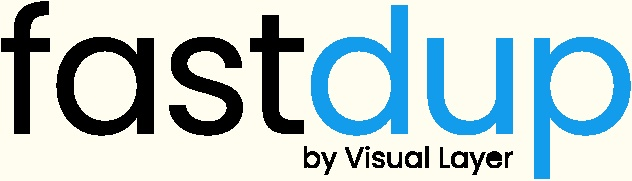
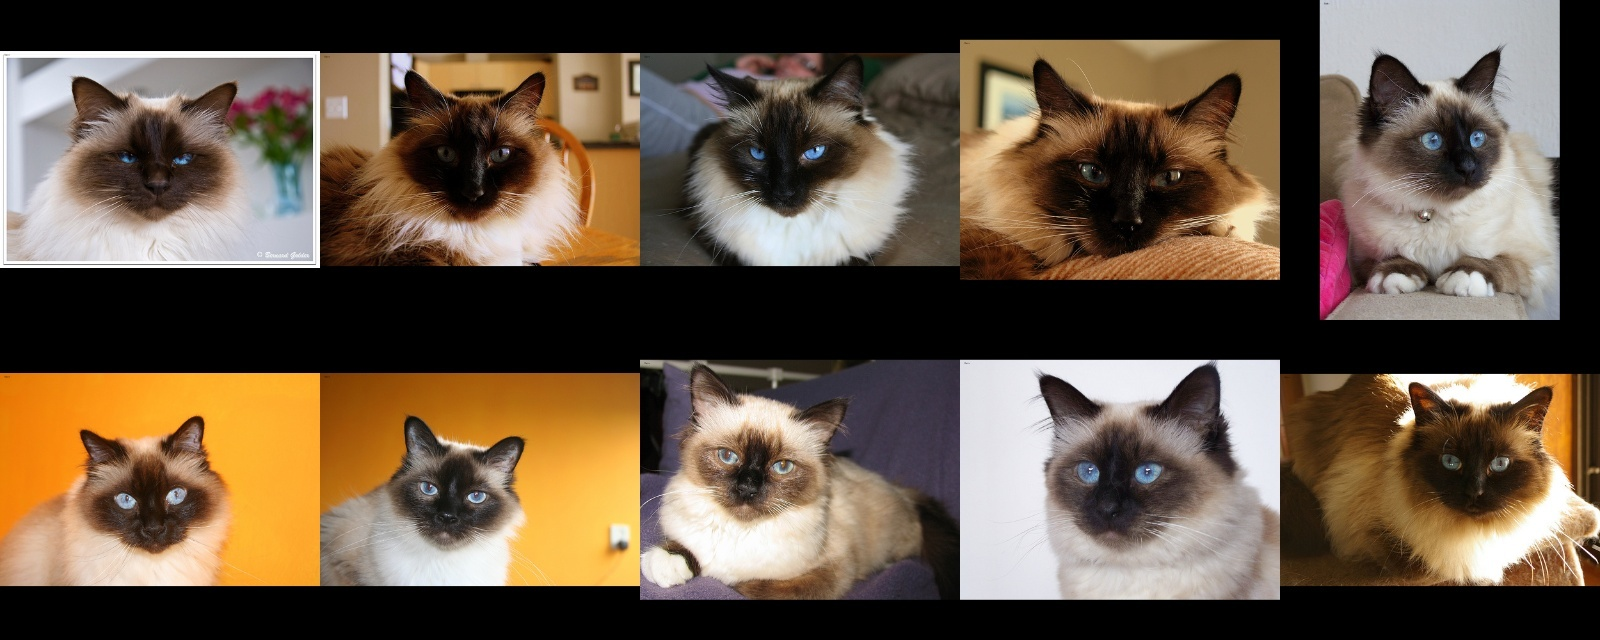
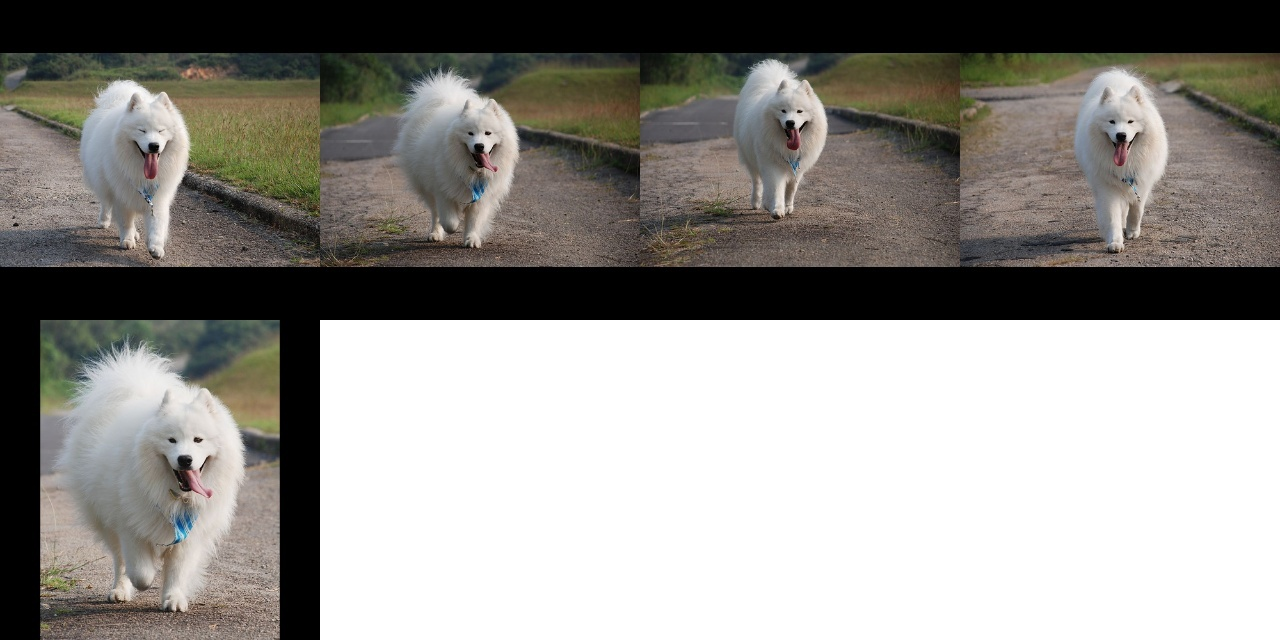
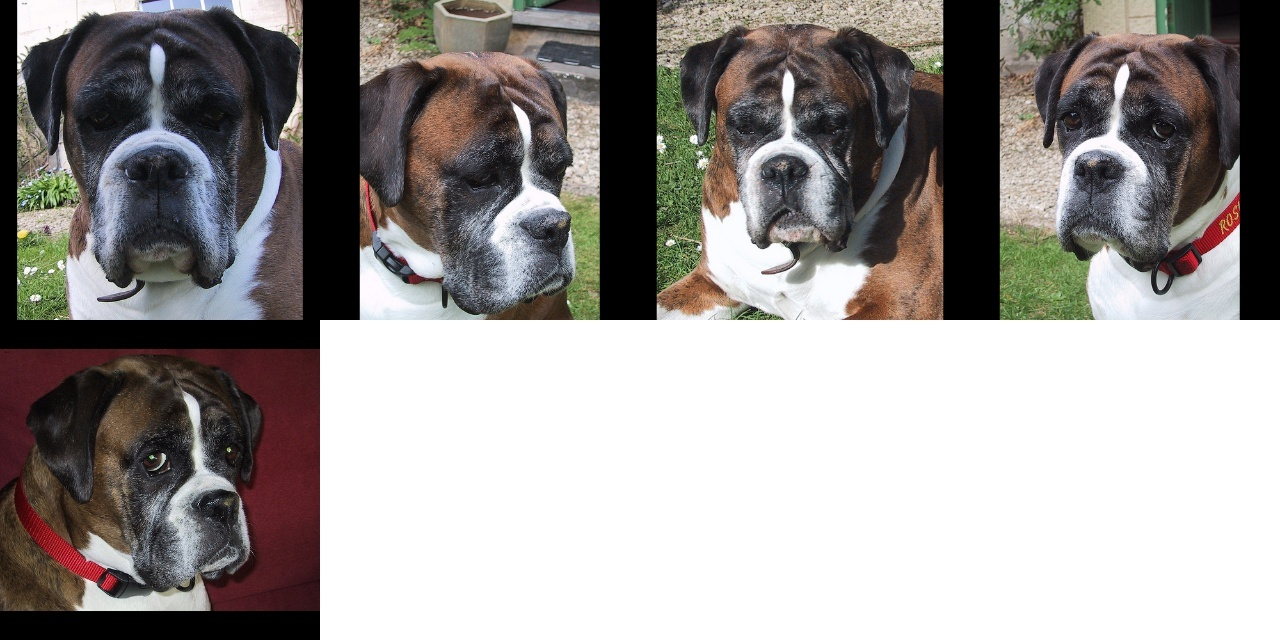
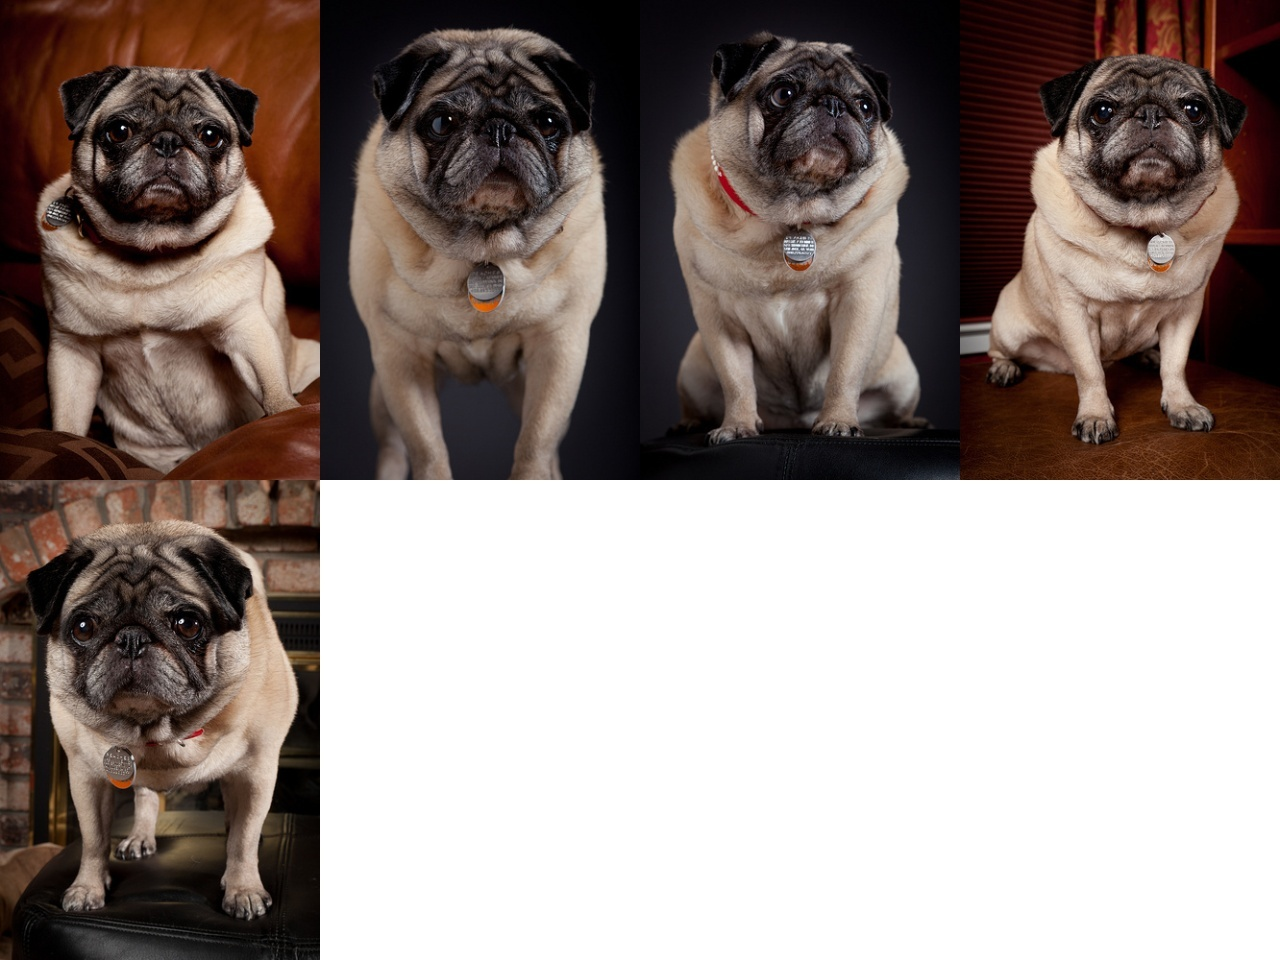
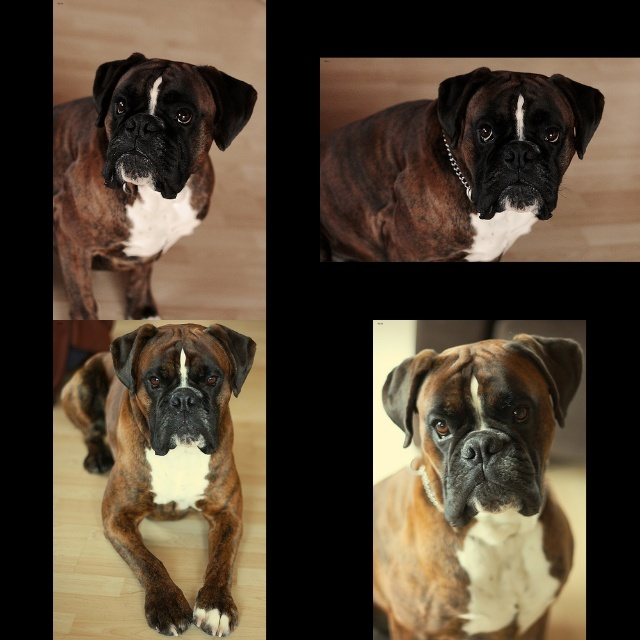
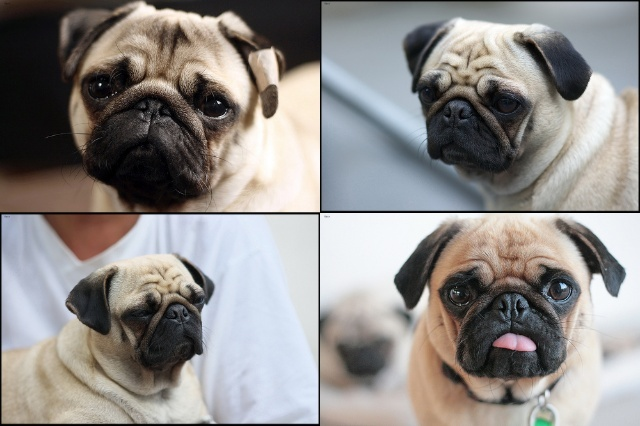
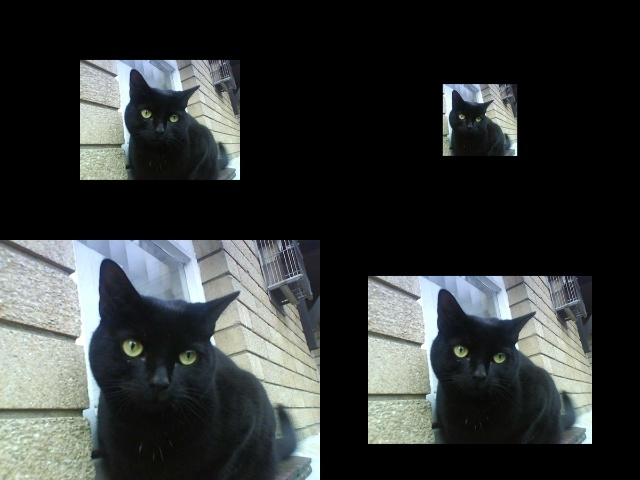
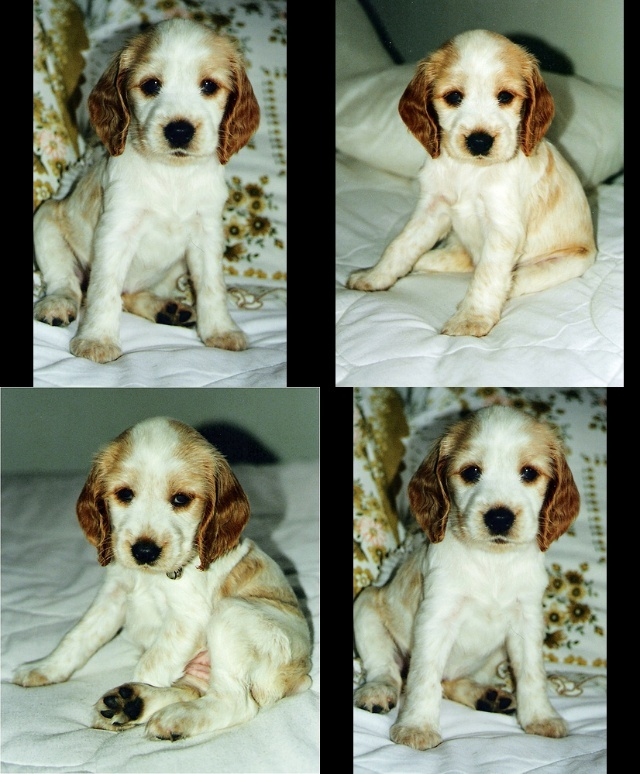
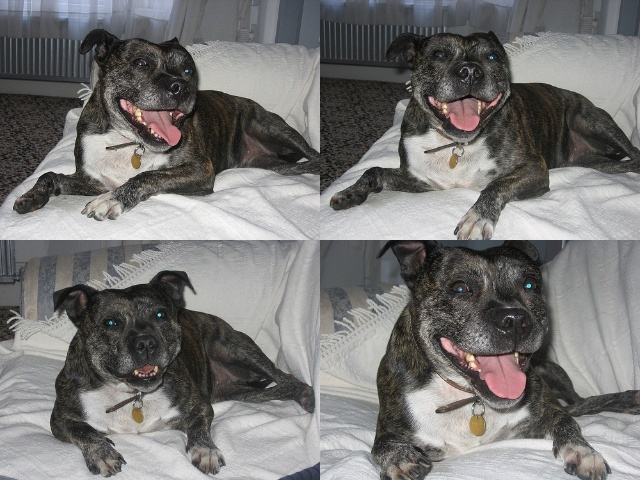
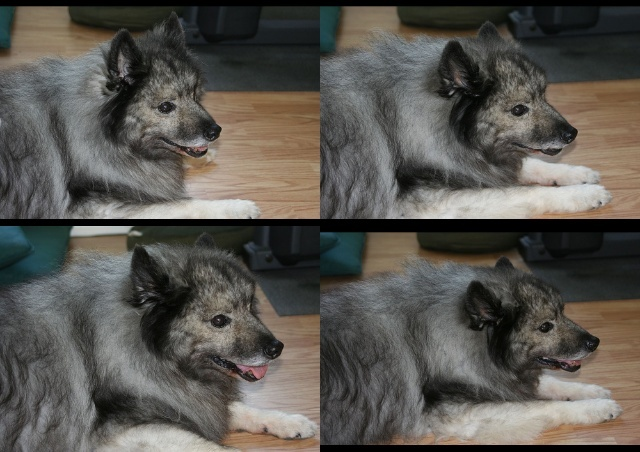
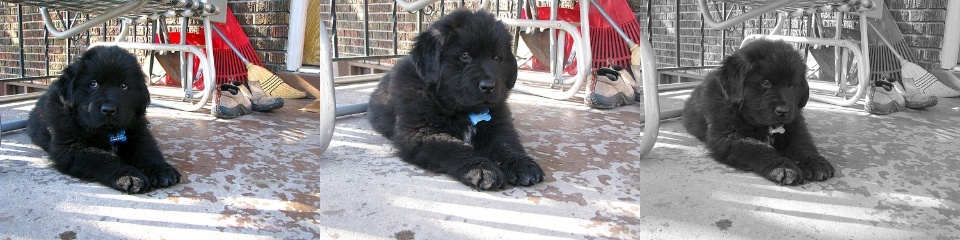
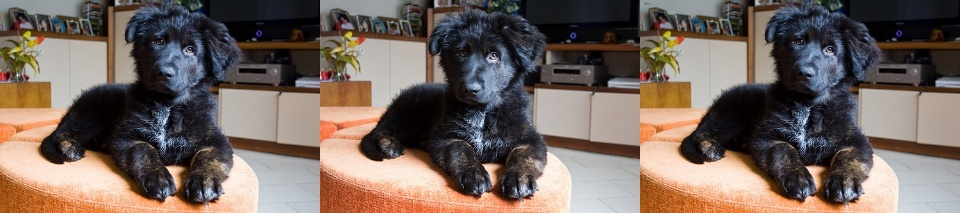
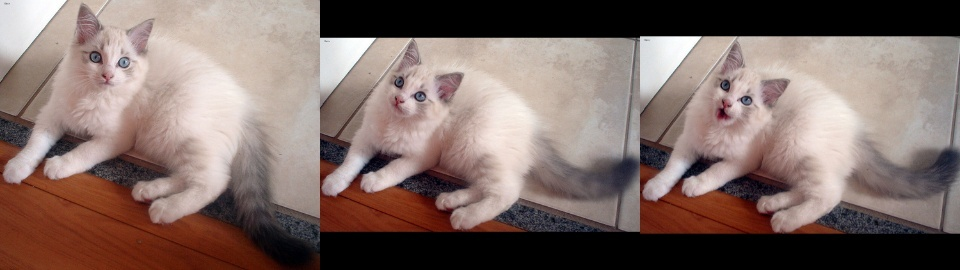
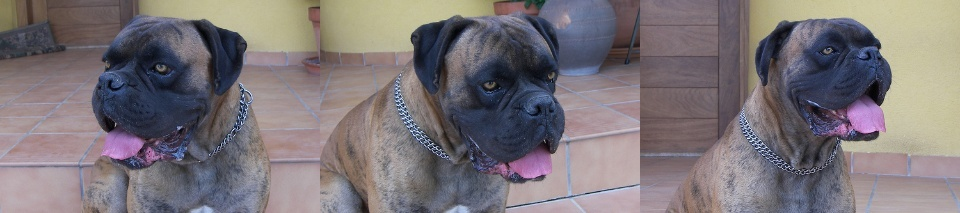
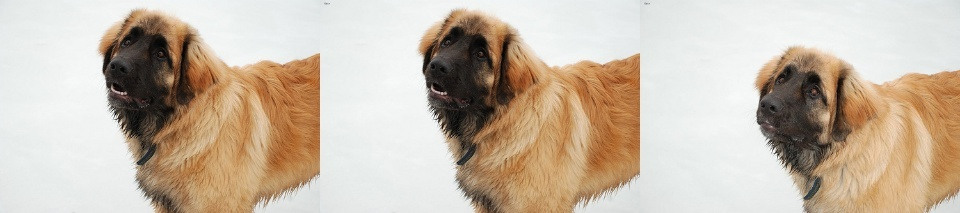
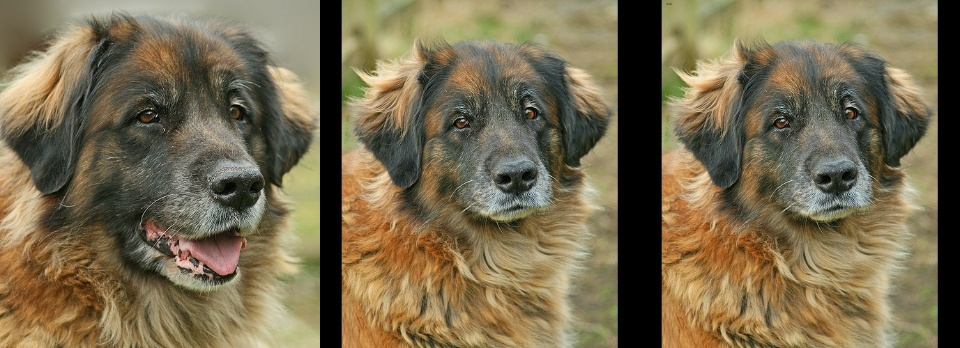
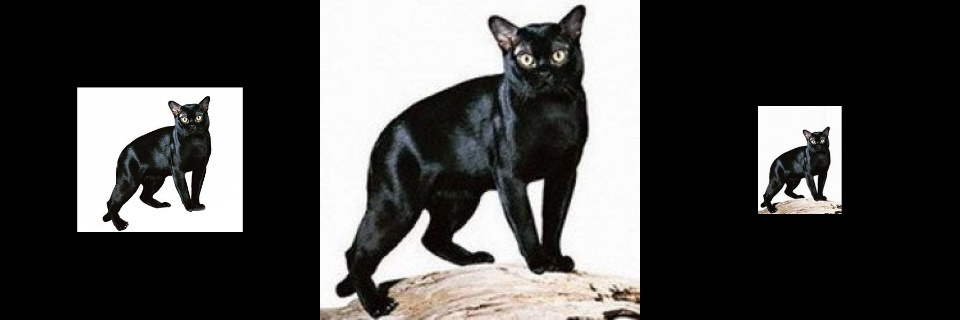
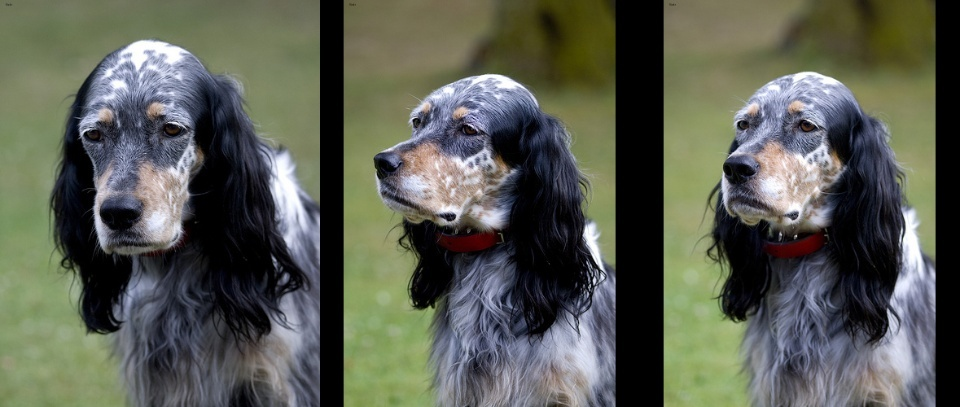
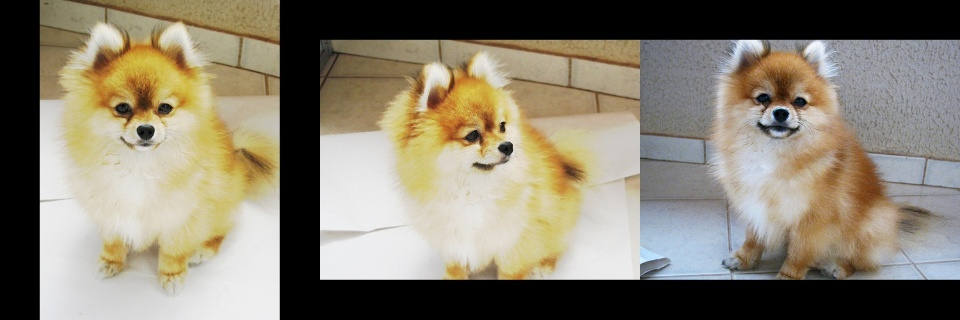
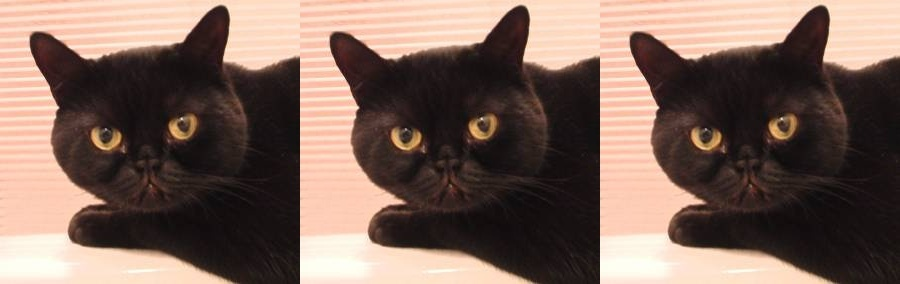

In [ ]:
fd.vis.component_gallery(keep_aspect_ratio=True)

In [ ]:
filenames, feature_vec = fastdup.load_binary_feature("fastdup_work_dir/atrain_features.dat", d=384)  

Read a total of  7384 images


In [ ]:
print("Feature vector matrix dimensions", feature_vec.shape)

Feature vector matrix dimensions (7384, 384)
